### EDA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_anime=pd.read_csv("/content/Animes.csv")
print("Shape of the Dataset:", df_anime.shape)
df_anime.head()

Shape of the Dataset: (12194, 18)


,anime_id,genres,name,average_rating,overview,type,episodes,producers,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
0,32281,"Drama, Romance, School, Supernatural",Kimi no Na wa.,8.85,"Mitsuha Miyamizu, a high school girl, yearns t...",Movie,1,"Toho, Sound Team Don Juan, Amuse, JR East Mark...","Funimation, NYAV Post",CoMix Wave Films,Original,PG-13 - Teens 13 or older,27,11,87268,1807089,2597495,https://cdn.myanimelist.net/images/anime/5/870...
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",Fullmetal Alchemist: Brotherhood,9.1,After a horrific alchemy experiment goes wrong...,TV,64,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,https://cdn.myanimelist.net/images/anime/1208/...
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama°,9.06,"Gintoki, Shinpachi, and Kagura return as the f...",TV,51,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,4,331,15947,237957,595767,https://cdn.myanimelist.net/images/anime/3/720...
3,9253,"Sci-Fi, Thriller",Steins;Gate,9.07,Eccentric scientist Rintarou Okabe has a never...,TV,24,"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,PG-13 - Teens 13 or older,3,13,182964,1336233,2440369,https://cdn.myanimelist.net/images/anime/1935/...
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama',9.04,"After a one-year hiatus, Shinpachi Shimura ret...",TV,51,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",UNKNOWN,Sunrise,Manga,PG-13 - Teens 13 or older,8,386,7765,226175,525688,https://cdn.myanimelist.net/images/anime/4/503...


In [ ]:
df_anime[df_anime['name']=='Gintama']['image url']

,image url
12,https://cdn.myanimelist.net/images/anime/10/73...


In [ ]:
from IPython.display import Image, display
anime_name = 'One Piece'  # Replace with the desired anime name
anime_row = df_anime[df_anime['name'] == anime_name].iloc[0]

image_url = anime_row['image url']
display(Image(url=image_url, width=300))

In [ ]:
df_anime[df_anime['name']=='Gintama']

,anime_id,genres,name,average_rating,overview,type,episodes,producers,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
12,918,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama,8.94,Edo is a city that was home to the vigor and a...,TV,201,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Audi...","Sentai Filmworks, Crunchyroll",Sunrise,Manga,PG-13 - Teens 13 or older,16,138,57678,381428,1023068,https://cdn.myanimelist.net/images/anime/10/73...


In [ ]:
df_rating = pd.read_csv('/content/drive/MyDrive/users-score-2023.csv')
df_rating.drop("Anime Title",axis = 1, inplace = True)
df_rating.rename(columns={'Username':'username'},inplace = True)
df_rating = df_rating[df_rating['rating'] >= 5]
# Calculate the number of ratings each user has given
counts = df_rating['user_id'].value_counts()
# Filter the DataFrame to include only users who have given more than 1000 ratings
df_rating = df_rating[df_rating['user_id'].isin(counts[counts > 1000].index)]
print("Shape of the dataset:",df_rating.shape)
df_rating.head()

Shape of the dataset: (1112830, 4)


,user_id,username,anime_id,rating
11230,357,zhambi,35427,5
11231,357,zhambi,28391,6
11232,357,zhambi,36649,7
11233,357,zhambi,530,6
11234,357,zhambi,37451,7


In [ ]:
# df_rating.to_csv("rating.csv",index = False)

In [ ]:
df_rating[df_rating['anime_id']==21]

,user_id,username,anime_id,rating
11247,357,zhambi,21,7
21713,467,June,21,10
33324,609,Canal,21,7
50067,817,AKIO-NOIR,21,9
52022,840,Dragon_Empress,21,8
...,...,...,...,...
24032729,1266845,TormentX,21,9
24060225,1268663,hardbot,21,10
24065243,1268745,bugsboy,21,9
24173901,1278419,aurorafemzy12,21,8


### Data Preprocessing

In [ ]:
df_anime['genres'].value_counts()

,count
genres,
Hentai,821
Comedy,517
Music,298
Kids,197
"Comedy, Slice of Life",176
...,...
"Comedy, Ecchi, Fantasy, Historical",1
"Martial Arts, School, Shounen",1
"Comedy, Magic, Seinen, Slice of Life",1


In [ ]:
df_anime['anime_rating'].value_counts()

,count
anime_rating,
PG-13 - Teens 13 or older,4520
G - All Ages,3406
Rx - Hentai,1122
PG - Children,1105
R+ - Mild Nudity,952
R - 17+ (violence & profanity),896
UNKNOWN,193


In [ ]:
df_anime['producers'].value_counts()

,count
producers,
UNKNOWN,4621
NHK,260
Pink Pineapple,189
Sanrio,142
Bandai Visual,118
...,...
"Production I.G, TV Tokyo, Aniplex",1
"TV Tokyo, Shogakukan-Shueisha Productions, Shogakukan Music & Digital Entertainment",1
Procidis,1


In [ ]:
df_anime['studios'].value_counts()

,count
studios,
UNKNOWN,2977
Toei Animation,726
Sunrise,442
J.C.Staff,296
Madhouse,294
...,...
"Eiken, Magic Bus",1
"Sunrise, Bandai Visual",1
"AIC Spirits, Ginga Ya, Gonzino",1


In [ ]:
df_anime['type'].value_counts()

,count
type,
TV,3791
OVA,3280
Movie,2340
Special,1626
ONA,674
Music,482
UNKNOWN,1


In [ ]:
df_anime['source'].value_counts()

,count
source,
Manga,3131
Original,2983
Unknown,2660
Visual novel,937
Light novel,541
Game,529
Other,355
Novel,324
4-koma manga,207


In [ ]:
df_anime[df_anime['average_rating']=='UNKNOWN']

,anime_id,genres,name,average_rating,overview,type,episodes,producers,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
5664,5693,Historical,"Shinran-sama: Negai, Soshite Hikari",UNKNOWN,"The life story of Shinran, founder of Joudo Sh...",OVA,1,UNKNOWN,UNKNOWN,UNKNOWN,Unknown,G - All Ages,19745,15569,0,UNKNOWN,432,https://cdn.myanimelist.net/images/anime/9/292...
6479,28247,"Comedy, Music",Pankis! 2-jigen,UNKNOWN,"St. Muse Academy: the place for the ""sound of ...",TV,24,UNKNOWN,UNKNOWN,DLE,Original,G - All Ages,18802,13811,1,UNKNOWN,698,https://cdn.myanimelist.net/images/anime/11/74...
8010,25627,Kids,"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokub...",UNKNOWN,Based on Aesop's Fables.,Movie,1,UNKNOWN,UNKNOWN,UNKNOWN,Unknown,PG - Children,14404,14939,2,UNKNOWN,497,https://cdn.myanimelist.net/images/anime/3/651...
8013,33978,"Historical, Military",0-sen Hayato Pilot,UNKNOWN,The pilot episode of 0-sen Hayato released onl...,OVA,1,UNKNOWN,UNKNOWN,UNKNOWN,Manga,PG-13 - Teens 13 or older,14415,15765,0,UNKNOWN,412,https://cdn.myanimelist.net/images/anime/3/817...
8022,29835,"Comedy, Kids, Romance",47 Todoufuken Specials,UNKNOWN,A two-part TV special focusing on the romance ...,Special,2,UNKNOWN,UNKNOWN,Pollyanna Graphics,Unknown,G - All Ages,14434,16005,0,UNKNOWN,390,https://cdn.myanimelist.net/images/anime/8/716...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,34310,NaN,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,UNKNOWN,First movie in 9 years for Tamagotchi. To prem...,Movie,1,UNKNOWN,UNKNOWN,OLM,Unknown,G - All Ages,12793,14932,0,UNKNOWN,500,https://cdn.myanimelist.net/images/anime/5/826...
10997,32596,"Adventure, Comedy, Fantasy, Kids",The Snack World (TV),UNKNOWN,"In ""a certain era"" on ""a certain continent,"" b...",TV,50,"TOHO animation, Level-5",UNKNOWN,"OLM, OLM Digital",Mixed media,G - All Ages,12922,13752,1,UNKNOWN,713,https://cdn.myanimelist.net/images/anime/3/833...
10998,34416,"Adventure, Comedy, Fantasy, Kids",The Snack World: Hitogirai no Renny,UNKNOWN,The Snack World follows a ragtag group of frie...,Movie,1,Level-5,UNKNOWN,"OLM, OLM Digital",Mixed media,G - All Ages,12922,16668,0,UNKNOWN,342,https://cdn.myanimelist.net/images/anime/1074/...
12157,9304,Hentai,Happy Day,UNKNOWN,"A 2000 film originally banned in South Korea, ...",OVA,1,UNKNOWN,UNKNOWN,UNKNOWN,Unknown,Rx - Hentai,UNKNOWN,13903,1,UNKNOWN,675,https://cdn.myanimelist.net/images/anime/1385/...


In [ ]:
df_anime['average_rating'].replace('UNKNOWN', np.nan, inplace=True)
df_anime['average_rating'] = pd.to_numeric(df_anime['average_rating'], errors='coerce')
df_anime['average_rating'].fillna(df_anime['average_rating'].median(), inplace=True)

<ipython-input-16-66e2239efc17>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_anime['average_rating'].replace('UNKNOWN', np.nan, inplace=True)
<ipython-input-16-66e2239efc17>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
df_anime.shape

(12194, 18)

In [ ]:
df_merged = pd.merge(df_rating, df_anime, on='anime_id', how='inner')
df_merged = df_merged[df_merged['average_rating'] >7]
print("Shape of the dataset:",df_merged.shape)
df_merged.head()

Shape of the dataset: (597114, 21)


,user_id,username,anime_id,rating,genres,name,average_rating,overview,type,episodes,...,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
1,357,zhambi,530,6,"Demons, Magic, Romance, Shoujo",Bishoujo Senshi Sailor Moon,7.73,Usagi Tsukino is an average student and crybab...,TV,46,...,"ADV Films, VIZ Media, DiC Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,1063,596,9912,182012,366386,https://cdn.myanimelist.net/images/anime/1440/...
3,357,zhambi,17895,7,"Comedy, Romance, Seinen",Golden Time,7.74,"Due to a tragic accident, Banri Tada is struck...",TV,24,...,Sentai Filmworks,J.C.Staff,Light novel,PG-13 - Teens 13 or older,1041,147,12704,523969,990104,https://cdn.myanimelist.net/images/anime/12/52...
4,357,zhambi,27991,7,"Action, Super Power, Supernatural",K: Return of Kings,7.56,Tensions are running high among the clans as t...,TV,13,...,VIZ Media,GoHands,Original,PG-13 - Teens 13 or older,1505,680,1194,152778,322002,https://cdn.myanimelist.net/images/anime/6/761...
5,357,zhambi,31798,9,"Drama, Sci-Fi",Kiznaiver,7.38,Katsuhira Agata is a quiet and reserved teenag...,TV,12,...,Aniplex of America,Trigger,Original,PG-13 - Teens 13 or older,2151,254,4860,346283,712543,https://cdn.myanimelist.net/images/anime/6/784...
6,357,zhambi,32949,9,"Drama, Romance, School, Seinen",Kuzu no Honkai,7.14,"To the outside world, Hanabi Yasuraoka and Mug...",TV,12,...,Sentai Filmworks,Lerche,Manga,R+ - Mild Nudity,3345,286,6262,320010,657725,https://cdn.myanimelist.net/images/anime/5/839...


In [ ]:
df_merged[df_merged['name']=='One Piece']

,user_id,username,anime_id,rating,genres,name,average_rating,overview,type,episodes,...,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
9,357,zhambi,21,7,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...
2527,467,June,21,10,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...
3508,609,Canal,21,7,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...
5712,817,AKIO-NOIR,21,9,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...
6822,840,Dragon_Empress,21,8,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906854,1266845,TormentX,21,9,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...
906858,1268663,hardbot,21,10,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...
909157,1268745,bugsboy,21,9,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...
910617,1278419,aurorafemzy12,21,8,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20,198986,1226493,2168904,https://cdn.myanimelist.net/images/anime/6/732...


In [ ]:
df_merged['average_rating'].value_counts()

,count
average_rating,
7.29,10210
7.28,8907
7.03,8265
7.41,7549
7.19,7312
...,...
8.40,285
9.06,283
8.98,235


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 597114 entries, 1 to 916415
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         597114 non-null  int64  
 1   username        597114 non-null  object 
 2   anime_id        597114 non-null  int64  
 3   rating          597114 non-null  int64  
 4   genres          597036 non-null  object 
 5   name            597114 non-null  object 
 6   average_rating  597114 non-null  float64
 7   overview        597114 non-null  object 
 8   type            597114 non-null  object 
 9   episodes        597114 non-null  object 
 10  producers       597114 non-null  object 
 11  licensors       597114 non-null  object 
 12  studios         597114 non-null  object 
 13  source          597114 non-null  object 
 14  anime_rating    597114 non-null  object 
 15  rank            597114 non-null  object 
 16  popularity      597114 non-null  int64  
 17  favorites      

In [ ]:
df_merged.describe()

,user_id,anime_id,rating,average_rating,popularity,favorites,members
count,5.971140e+05,597114.000000,597114.000000,597114.000000,597114.000000,597114.000000,5.971140e+05
mean,3.562398e+05,11478.223195,7.623353,7.637328,1710.957660,6485.020051,3.778791e+05
std,3.420692e+05,10619.191551,1.284274,0.444813,1586.613339,19296.773524,5.285431e+05
min,3.570000e+02,1.000000,5.000000,7.010000,1.000000,0.000000,9.280000e+02
25%,5.949300e+04,1858.000000,7.000000,7.280000,477.000000,161.000000,6.512800e+04
50%,3.330680e+05,8726.000000,8.000000,7.550000,1266.000000,775.000000,1.747020e+05
75%,4.783660e+05,18689.000000,8.000000,7.930000,2527.000000,3729.000000,4.363000e+05
max,1.289699e+06,34514.000000,10.000000,9.100000,12871.000000,217606.000000,3.744541e+06


In [ ]:
df_merged.describe(include='object')

,username,genres,name,overview,type,episodes,producers,licensors,studios,source,anime_rating,rank,scored by,image url
count,597114,597036,597114,597114,597114,597114,597114,597114,597114,597114,597114,597114,597114,597114
unique,813,1439,2945,2928,6,137,1416,179,322,15,7,2502,2877,2945
top,MunrowjinBuu,"Comedy, School, Slice of Life",Toradora!,The story follows a boy named Quon and others ...,TV,1,UNKNOWN,Funimation,J.C.Staff,Manga,PG-13 - Teens 13 or older,UNKNOWN,1330877,https://cdn.myanimelist.net/images/anime/13/22...
freq,1590,9469,737,924,372132,157020,79628,118730,37217,269970,376604,6549,737,737


In [ ]:
df_merged.isnull().sum()

,0
user_id,0
username,0
anime_id,0
rating,0
genres,78
name,0
average_rating,0
overview,0
type,0
episodes,0


# Recommendation Systems

### Collaborative Filtering

#### 1) Collaborative filtering using tensorflow

In [ ]:
df = pd.read_csv('/content/rating.csv')
print("Shape of the dataset:",df.shape)
df.head()

Shape of the dataset: (1112830, 4)


,user_id,username,anime_id,rating
0,357,zhambi,35427,5
1,357,zhambi,28391,6
2,357,zhambi,36649,7
3,357,zhambi,530,6
4,357,zhambi,37451,7


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings(action='ignore')

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Model Training
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Import necessary modules for collaborative filtering
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from collections import defaultdict
from collections import Counter

## Import necessary modules for content-based filtering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
avg_score = np.mean(df['rating'])
print('Average Score:', avg_score)

Average Score: 7.307548322744714


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

df['scaled_score'] = scaler.fit_transform(df[['rating']])

In [ ]:
## Encoding user IDs
user_encoder = LabelEncoder()
df["user_encoded"] = user_encoder.fit_transform(df["user_id"])
num_users = len(user_encoder.classes_)

## Encoding anime IDs
anime_encoder = LabelEncoder()
df["anime_encoded"] = anime_encoder.fit_transform(df["anime_id"])
num_animes = len(anime_encoder.classes_)

# Printing dataset information
print("Number of unique users: {}, Number of unique anime: {}".format(num_users, num_animes))
print("Minimum rating: {}, Maximum rating: {}".format(min(df['rating']), max(df['rating'])))

Number of unique users: 813, Number of unique anime: 14579
Minimum rating: 5, Maximum rating: 10


In [ ]:
# Shuffle the dataset
df = shuffle(df, random_state=100)

# Create feature matrix X and target variable y
X = df[['user_encoded', 'anime_encoded']].values
y = df["scaled_score"].values

# Printing dataset information
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1112830, 2)
Shape of y: (1112830,)


In [ ]:
test_set_size = 10000  # Number of samples to include in the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=73)

print("Number of samples in the training set:", len(y_train))
print("Number of samples in the test set:", len(y_test))

Number of samples in the training set: 1102830
Number of samples in the test set: 10000


In [ ]:
# Prepare input data for model training and evaluation
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [ ]:
def RecommenderNet(num_users, num_animes, embedding_size=128):
    # User input layer and embedding layer
    user = Input(name='user_encoded', shape=[1])
    user_embedding = Embedding(name='user_embedding', input_dim=num_users, output_dim=embedding_size)(user)

    # Anime input layer and embedding layer
    anime = Input(name='anime_encoded', shape=[1])
    anime_embedding = Embedding(name='anime_embedding', input_dim=num_animes, output_dim=embedding_size)(anime)

    # Dot product of user and anime embeddings
    dot_product = Dot(name='dot_product', normalize=True, axes=2)([user_embedding, anime_embedding])
    flattened = Flatten()(dot_product)

    # Dense layers for prediction
    dense = Dense(64, activation='relu')(flattened)
    output = Dense(1, activation='sigmoid')(dense)

    # Create and compile the model
    model = Model(inputs=[user, anime], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=["mae", "mse"])

    return model
model = RecommenderNet(num_users, num_animes)

In [ ]:
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.13-cp310-cp310-linux_x86_64.whl


ERROR: torch_xla-1.13-cp310-cp310-linux_x86_64.whl is not a supported wheel on this platform.


In [ ]:
import tensorflow as tf
tpu_strategy = None
try:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
  print("All devices: ", tf.config.list_logical_devices('TPU'))
  tpu_strategy  = tf.distribute.TPUStrategy(resolver)
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

with tpu_strategy.scope():  # Creating the model in the TPUStrategy scope means we will train the model on the TPU
    model = RecommenderNet(num_users, num_animes)

# Printing my model summary
model.summary()

All devices:  [LogicalDevice(name='/device:TPU:0', device_type='TPU'), LogicalDevice(name='/device:TPU:1', device_type='TPU'), LogicalDevice(name='/device:TPU:2', device_type='TPU'), LogicalDevice(name='/device:TPU:3', device_type='TPU'), LogicalDevice(name='/device:TPU:4', device_type='TPU'), LogicalDevice(name='/device:TPU:5', device_type='TPU'), LogicalDevice(name='/device:TPU:6', device_type='TPU'), LogicalDevice(name='/device:TPU:7', device_type='TPU')]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_encoded (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ anime_encoded             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 128)         │        104,064 │ user_encoded[0][0]     │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ anime_embedding           │ (None, 1, 128)         │      1,866,112 │ anime_encoded[0][0]    │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_product (Dot)         │ (None, 1, 1)           │              0 │ user_embedding[0][0],  │
│                           │                        │                │ anime_embedding[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 1)              │              0 │ dot_product[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │            128 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,970,369 (7.52 MB)

 Trainable params: 1,970,369 (7.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Import necessary callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping

# Define the initial learning rate, minimum learning rate, maximum learning rate, and batch size
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000


# Define the number of epochs for ramp-up, sustain, and exponential decay
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate schedule function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr) / rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch - rampup_epochs - sustain_epochs) + min_lr

# Learning rate scheduler callback
lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# File path for saving the model weights
checkpoint_filepath = 'myanimeweights.weights.h5'

# Model checkpoint callback to save the best weights
model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                    save_weights_only=True,
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min', restore_best_weights=True)

# Define the list of callbacks
my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping
]

In [ ]:
# Model training
batch_size = 1024 * tpu_strategy.num_replicas_in_sync
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.6926 - mae: 0.2245 - mse: 0.0727 - val_loss: 0.6925 - val_mae: 0.2213 - val_mse: 0.0711 - learning_rate: 1.0000e-05
Epoch 2/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.6923 - mae: 0.2242 - mse: 0.0725 - val_loss: 0.6921 - val_mae: 0.2207 - val_mse: 0.0709 - learning_rate: 1.8000e-05
Epoch 3/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.6917 - mae: 0.2234 - mse: 0.0722 - val_loss: 0.6915 - val_mae: 0.2199 - val_mse: 0.0706 - learning_rate: 2.6000e-05
Epoch 4/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.6911 - mae: 0.2231 - mse: 0.0723 - val_loss: 0.6910 - val_mae: 0.2189 - val_mse: 0.0704 - learning_rate: 3.4000e-05
Epoch 5/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.6904 - mae: 0.2216 - mse: 0.0716 - val_loss: 0.6907 - val_mae: 0.2179 - val_mse: 0.0702 - learning_rate: 4.2000e-05
Epoch 6/20
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.6900 - mae: 0.2202 - mse: 0.0714 - val_lo

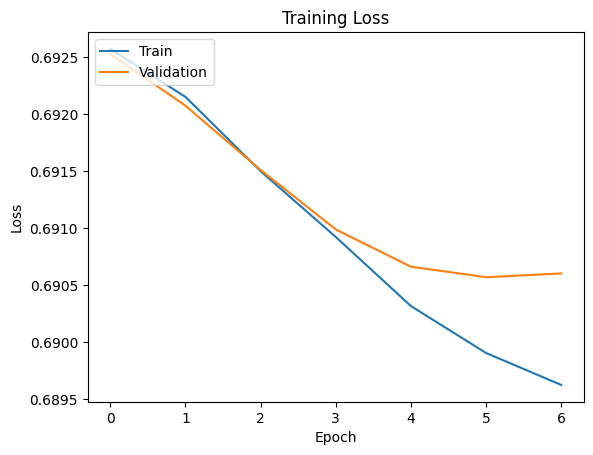

In [ ]:
# Training results visualization
plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [ ]:
# Evaluate the model on the test set
evaluation = model.evaluate(X_test_array, y_test)
print(f"Test Loss: {evaluation[0]}, Test MAE: {evaluation[1]}, Test MSE: {evaluation[2]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.6882 - mae: 0.2259 - mse: 0.0756
Test Loss: 0.6889620423316956, Test MAE: 0.22080963850021362, Test MSE: 0.07248374819755554


In [ ]:
def get_unrated_anime(user_id, df, num_animes):
    watched_anime_ids = df[df['user_id'] == user_id]['anime_id'].tolist()
    all_anime_ids = list(range(num_animes))
    unrated_anime_ids = [anime_id for anime_id in all_anime_ids if anime_id not in watched_anime_ids]
    return unrated_anime_ids

In [ ]:
def recommend_anime(user_id, model, num_animes, n_recommendations=10):
    unrated_anime_ids = get_unrated_anime(user_id, df, num_animes)
    user_array = np.array([user_id] * len(unrated_anime_ids))
    anime_array = np.array(unrated_anime_ids)

    predictions = model.predict([user_array, anime_array])
    predicted_ratings = predictions.flatten()

    top_indices = predicted_ratings.argsort()[-n_recommendations:][::-1]
    recommended_anime_ids = [unrated_anime_ids[i] for i in top_indices]

    return recommended_anime_ids

In [ ]:
user_id = 10
recommended_anime_ids = recommend_anime(user_id, model, num_animes, n_recommendations=10)

# Map the recommended anime IDs back to their names
original_anime_ids = anime_encoder.inverse_transform(recommended_anime_ids)
print("Original Anime IDs for User 0:", original_anime_ids)
recommended_anime_names = df_anime[df_anime['anime_id'].isin(original_anime_ids)]['name'].values
print("Recommended Anime Names for User 0:", recommended_anime_names)

456/456 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step
Original Anime IDs for User 0: [ 1677  6520   360  5324 51368 29715  6743 33681  3724 48930]
Recommended Anime Names for User 0: ['Young Herlock wo Oe! Cosmo Warrior Zero Gaiden'
 'Utawarerumono OVA Picture Drama' 'Himiko-den' 'Taiko no Tatsujin'
 'Anime TV de Hakken! Tamagotchi' 'Nar Doma' 'Yakin Byoutou Kranke']


#### 2) Singular Value Decomposition - SVD

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505179 sha256=d8b2d0a795484a103be36251517773322e6b5fec06d83cec4c37d86faabcb99f
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_merged[['user_id', 'anime_id', 'rating']], reader)

# Train the SVD model
svd = SVD()
cross_validate(svd, data, cv=5)

# Fit the model on the entire dataset
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
# Function to get top recommendations for a user
def get_collab_recommendations(user_id, n=10):
    anime_ids = df_merged['anime_id'].unique()
    predictions = [(anime_id, svd.predict(user_id, anime_id).est) for anime_id in anime_ids]
    predictions.sort(key=lambda x: x[1], reverse=True)
    anime_ids = [pred[0] for pred in predictions[:n]]
    anime_names = set(df_merged[df_merged['anime_id'].isin(anime_ids)]['name'].tolist())
    return anime_names

In [ ]:
get_collab_recommendations(34, n=10)

{'Clannad: After Story',
 'Code Geass: Hangyaku no Lelouch',
 'Code Geass: Hangyaku no Lelouch R2',
 'Fullmetal Alchemist: Brotherhood',
 'Ginga Eiyuu Densetsu',
 'Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare',
 "Gintama'",
 'Gintama°',
 'Kimi no Na wa.',
 'Steins;Gate'}

In [ ]:
df_merged[df_merged['name']=='One Piece']

,user_id,username,anime_id,rating,genres,name,average_rating,overview,type,episodes,...,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
8,357,zhambi,21,7,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...
3279,817,AKIO-NOIR,21,9,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...
4238,840,Dragon_Empress,21,8,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...
8704,1475,otaku515,21,8,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...
9542,2152,leapylee,21,10,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628251,1266845,TormentX,21,9,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...
628254,1268663,hardbot,21,10,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...
630336,1268745,bugsboy,21,9,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...
631438,1278419,aurorafemzy12,21,8,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",One Piece,8.69,"Gol D. Roger was known as the ""Pirate King,"" t...",TV,UNKNOWN,...,"Funimation, 4Kids Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,55,20.0,198986.0,1226493,2168904.0,https://cdn.myanimelist.net/images/anime/6/732...


#### 3) Item-Based Collaborative Filtering using KNN- Anime recommendations based on user ratings

In [ ]:
df = df_merged.copy()
df.shape

(438461, 21)

In [ ]:
df.head()

,user_id,username,anime_id,rating,genres,name,average_rating,overview,type,episodes,...,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
1,357,zhambi,530,6,"Demons, Magic, Romance, Shoujo",Bishoujo Senshi Sailor Moon,7.73,Usagi Tsukino is an average student and crybab...,TV,46,...,"ADV Films, VIZ Media, DiC Entertainment",Toei Animation,Manga,PG-13 - Teens 13 or older,1063,596.0,9912.0,182012,366386.0,https://cdn.myanimelist.net/images/anime/1440/...
3,357,zhambi,17895,7,"Comedy, Romance, Seinen",Golden Time,7.74,"Due to a tragic accident, Banri Tada is struck...",TV,24,...,Sentai Filmworks,J.C.Staff,Light novel,PG-13 - Teens 13 or older,1041,147.0,12704.0,523969,990104.0,https://cdn.myanimelist.net/images/anime/12/52...
4,357,zhambi,27991,7,"Action, Super Power, Supernatural",K: Return of Kings,7.56,Tensions are running high among the clans as t...,TV,13,...,VIZ Media,GoHands,Original,PG-13 - Teens 13 or older,1505,680.0,1194.0,152778,322002.0,https://cdn.myanimelist.net/images/anime/6/761...
5,357,zhambi,31798,9,"Drama, Sci-Fi",Kiznaiver,7.38,Katsuhira Agata is a quiet and reserved teenag...,TV,12,...,Aniplex of America,Trigger,Original,PG-13 - Teens 13 or older,2151,254.0,4860.0,346283,712543.0,https://cdn.myanimelist.net/images/anime/6/784...
6,357,zhambi,18195,6,"Comedy, Drama, Romance, School, Slice of Life,...",Little Busters! Refrain,8.19,Following the Little Busters after they lost t...,TV,13,...,Sentai Filmworks,J.C.Staff,Visual novel,PG-13 - Teens 13 or older,358,1353.0,2080.0,75684,161901.0,https://cdn.myanimelist.net/images/anime/10/55...


In [ ]:
anime_pivot = df.pivot_table(index='name',columns='user_id',values='rating').fillna(0)
anime_pivot.head()

user_id,357,436,817,840,1105,1251,1307,1475,1998,2152,...,1261511,1262157,1266845,1268663,1268745,1278419,1281059,1283219,1288175,1289217
name,,,,,,,,,,,,,,,,,,,,,
"""Bungaku Shoujo"" Memoire",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,9.0,0.0
"""Bungaku Shoujo"" Movie",0.0,8.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,7.0,0.0,0.0,0.0,0.0,9.0,0.0
.hack//G.U. Trilogy,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Quantum,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//The Movie: Sekai no Mukou ni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,10.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

item_user_matrix = csr_matrix(anime_pivot.values)
knn_item_based = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_item_based.fit(item_user_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def get_item_based_recommendations(anime_name, n_recommendations=5):
    # Find the index of the anime title
    if anime_name not in anime_pivot.index:
        return f"Anime title '{anime_name}' not found in the dataset."

    query_index = anime_pivot.index.get_loc(anime_name)

    # Use the KNN model to find the nearest neighbors
    distances, indices = knn_item_based.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors=n_recommendations + 1)

    recommendations = []
    for i in range(1, len(distances.flatten())):
        anime_title = anime_pivot.index[indices.flatten()[i]]
        distance = distances.flatten()[i]
        recommendations.append((anime_title, distance))

    return recommendations

In [ ]:
anime_name = "One Piece"
item_based_recommendations = get_item_based_recommendations(anime_name,10)

if isinstance(item_based_recommendations, str):
    print(item_based_recommendations)
else:
    print(f"Based on user rating, If you like '{anime_name}' you will definetly like below recommendations....")
    for i, (title, distance) in enumerate(item_based_recommendations, 1):
        print(f"{i}: {title}, with distance of {distance:.4f}")

Based on user rating, If you like 'One Piece' you will definetly like below recommendations....
1: Bleach, with distance of 0.2631
2: Naruto, with distance of 0.2764
3: One Piece Film: Strong World, with distance of 0.2778
4: Soul Eater, with distance of 0.2943
5: Code Geass: Hangyaku no Lelouch, with distance of 0.2989
6: Death Note, with distance of 0.3009
7: Fairy Tail, with distance of 0.3021
8: One Piece Movie 04: Dead End no Bouken, with distance of 0.3047
9: Code Geass: Hangyaku no Lelouch R2, with distance of 0.3054
10: Fullmetal Alchemist: Brotherhood, with distance of 0.3057


#### 4) User-Based Collaborative Filtering using KNN

In [ ]:
user_pivot = df.pivot_table(index='user_id',columns='name',values='rating').fillna(0)
user_pivot.head()

name,"""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie",.hack//G.U. Trilogy,.hack//Quantum,.hack//The Movie: Sekai no Mukou ni,07-Ghost,11-nin Iru!,3-gatsu no Lion,3-gatsu no Lion meets Bump of Chicken,30-pun de Wakaru! Kore made no Love Live!,...,ef: A Tale of Melodies. - Prologue,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,ef: A Tale of Memories. - Recollections,s.CRY.ed,xxxHOLiC,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,xxxHOLiC◆Kei
user_id,,,,,,,,,,,,,,,,,,,,,
357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
436,0.0,8.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,7.0,10.0,7.0,0.0,7.0,7.0,7.0,0.0,0.0,0.0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,8.0,8.0,7.0,9.0,8.0,8.0
840,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,6.0,8.0,8.0,0.0,7.0,8.0
1105,0.0,9.0,7.0,6.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

user_item_matrix = csr_matrix(user_pivot.values)
knn_user_based = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_user_based.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def get_user_based_recommendations(user_id, n_recommendations=5):
    # Convert user_id to the same type as user_pivot index
    user_id = float(user_id)

    # Check if the user exists in the matrix
    if user_id not in user_pivot.index:
        return f"User '{user_id}' not found in the dataset."

    # Find the user index
    user_idx = user_pivot.index.get_loc(user_id)

    # Find the nearest neighbors (most similar users)
    distances, indices = knn_user_based.kneighbors(user_pivot.iloc[user_idx, :].values.reshape(1, -1), n_neighbors=n_recommendations + 1)

    # Get the list of anime this user has already rated
    user_rated_anime = set(user_pivot.columns[user_pivot.iloc[user_idx, :] > 100])

    # Gather all anime rated by nearest neighbors
    all_neighbor_ratings = []
    for i in range(1, len(distances.flatten())):
        neighbor_idx = indices.flatten()[i]
        neighbor_rated_anime = user_pivot.iloc[neighbor_idx, :]
        neighbor_ratings = neighbor_rated_anime[neighbor_rated_anime > 0]
        all_neighbor_ratings.extend(neighbor_ratings.index)

    # Count the frequency of each anime rated by the neighbors
    from collections import Counter
    anime_counter = Counter(all_neighbor_ratings)

    # Recommend the most common anime among the neighbors that the user hasn't rated yet
    recommendations = [(anime, count) for anime, count in anime_counter.items() if anime not in user_rated_anime]
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Return the top N recommendations
    return recommendations[:n_recommendations]

In [ ]:
user_id = 817
user_recommendations = get_user_based_recommendations(user_id,10)

# Check if recommendations is a string (indicating an error)
if isinstance(user_recommendations, str):
    print(user_recommendations)
else:
    print(f"User-based recommendations for user ID {user_id}:")
    for anime, count in user_recommendations:
        print(f"{anime}, Recommended by {count} similar users")

User '34.0' not found in the dataset.


## Content based Filtering

Content-based filtering, also referred to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document.A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

#### 1) Using TFIDF

##### a. Sigmoid Kernel

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Animes.csv")
print("Shape of the Dataset:", df.shape)
df.head()

Shape of the Dataset: (12194, 18)


,anime_id,genres,name,average_rating,overview,type,episodes,producers,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
0,32281,"Drama, Romance, School, Supernatural",Kimi no Na wa.,8.85,"Mitsuha Miyamizu, a high school girl, yearns t...",Movie,1,"Toho, Sound Team Don Juan, Amuse, JR East Mark...","Funimation, NYAV Post",CoMix Wave Films,Original,PG-13 - Teens 13 or older,27,11,87268,1807089,2597495,https://cdn.myanimelist.net/images/anime/5/870...
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",Fullmetal Alchemist: Brotherhood,9.1,After a horrific alchemy experiment goes wrong...,TV,64,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,https://cdn.myanimelist.net/images/anime/1208/...
2,28977,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama°,9.06,"Gintoki, Shinpachi, and Kagura return as the f...",TV,51,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,4,331,15947,237957,595767,https://cdn.myanimelist.net/images/anime/3/720...
3,9253,"Sci-Fi, Thriller",Steins;Gate,9.07,Eccentric scientist Rintarou Okabe has a never...,TV,24,"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,PG-13 - Teens 13 or older,3,13,182964,1336233,2440369,https://cdn.myanimelist.net/images/anime/1935/...
4,9969,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama',9.04,"After a one-year hiatus, Shinpachi Shimura ret...",TV,51,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",UNKNOWN,Sunrise,Manga,PG-13 - Teens 13 or older,8,386,7765,226175,525688,https://cdn.myanimelist.net/images/anime/4/503...


In [ ]:
# df = df_merged.copy()
df.dropna(inplace = True)
# df.shape

In [ ]:
df.columns

Index(['anime_id', 'genres', 'name', 'average_rating', 'overview', 'type',
       'episodes', 'producers', 'licensors', 'studios', 'source',
       'anime_rating', 'rank', 'popularity', 'favorites', 'scored by',
       'members', 'image url'],
      dtype='object')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

tfv_matrix = tfv.fit_transform(df['genres'])

In [ ]:
tfv_matrix.shape

(12133, 1552)

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [ ]:
def get_rec_sig(title, sig=sig,n_recommendations = 10):
    if title not in indices.index:
          print(f"Anime title '{title}' not found in the dataset.")
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    sig_scores = sig_scores[1:n_recommendations+1]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]
    return pd.DataFrame({'Anime name': df['name'].iloc[anime_indices].values,
                                 'Rating': df['average_rating'].iloc[anime_indices].values})

In [ ]:
get_rec_sig('Naruto', n_recommendations=15)

,Anime name,Rating
0,Naruto: Shippuuden,8.26
1,Naruto,7.99
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.33
3,Naruto x UT,7.37
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.42
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.33
6,Naruto: Shippuuden - Sunny Side Battle,7.56
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,6.96
8,Battle Spirits: Ryuuko no Ken,4.78
9,Kyutai Panic Adventure!,4.67


##### b. Linear Kernel

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

lin = linear_kernel(tfv_matrix, tfv_matrix)

In [ ]:
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [ ]:
def get_rec_lin(title, lin=lin,n_recommendations = 10):
    if title not in indices.index:
          print(f"Anime title '{title}' not found in the dataset.")
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    lin_scores = list(enumerate(lin[idx]))

    # Sort the movies
    lin_scores = sorted(lin_scores, key=lambda x: x[1], reverse=True)

    lin_scores = lin_scores[1:n_recommendations+1]

    # Movie indices
    anime_indices = [i[0] for i in lin_scores]
    return pd.DataFrame({'Anime name': df['name'].iloc[anime_indices].values,
                                 'Rating': df['average_rating'].iloc[anime_indices].values})

In [ ]:
get_rec_lin('Naruto', n_recommendations=15)

,Anime name,Rating
0,Naruto: Shippuuden,8.26
1,Naruto,7.99
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.33
3,Naruto x UT,7.37
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.42
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.33
6,Naruto: Shippuuden - Sunny Side Battle,7.56
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,6.96
8,Battle Spirits: Ryuuko no Ken,4.78
9,Kyutai Panic Adventure!,4.67


#### 2) Using count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Initialize CountVectorizer
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words='english',max_features=5000)

# Fit and transform the genre data
count_matrix = count_vectorizer.fit_transform(df['genres'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Create a reverse mapping of anime titles to indices
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

# Function to get recommendations
def get_rec(title, cosine_sim=cosine_sim, n_recommendations=5):
    if title not in indices.index:
        return f"Anime title '{title}' not found in the dataset."

    # Get the index of the anime that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar anime (excluding the input anime itself)
    sim_scores = sim_scores[1:n_recommendations+1]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top n most similar anime
    return pd.DataFrame({'Anime name': df['name'].iloc[anime_indices].values,
                         'Rating': df['average_rating'].iloc[anime_indices].values})

In [ ]:
get_rec( "Naruto", n_recommendations=15)

,Anime name,Rating
0,Naruto: Shippuuden,8.26
1,Naruto,7.99
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.33
3,Naruto x UT,7.37
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.42
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.33
6,Naruto: Shippuuden - Sunny Side Battle,7.56
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,6.96
8,Battle Spirits: Ryuuko no Ken,4.78
9,Kyutai Panic Adventure!,4.67


As you can see both count Vectorizer and TF-IDF are giving same recommendations. We will lean towards TfidfVectorizer for more accurate and meaningful recommendations, especially in content-based systems that handle large or complex textual data. CountVectorizer might be used in scenarios where quick and simple solutions are sufficient or for smaller datasets.

## Popularity-Based Filtering

In [ ]:
import seaborn as sns

In [ ]:
df = df_anime.copy()

In [ ]:
df.head(2)

,anime_id,genres,name,average_rating,overview,type,episodes,producers,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
0,32281,"Drama, Romance, School, Supernatural",Kimi no Na wa.,8.85,"Mitsuha Miyamizu, a high school girl, yearns t...",Movie,1,"Toho, Sound Team Don Juan, Amuse, JR East Mark...","Funimation, NYAV Post",CoMix Wave Films,Original,PG-13 - Teens 13 or older,27,11,87268,1807089,2597495,https://cdn.myanimelist.net/images/anime/5/870...
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",Fullmetal Alchemist: Brotherhood,9.10,After a horrific alchemy experiment goes wrong...,TV,64,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,https://cdn.myanimelist.net/images/anime/1208/...


#### 1) Top n animes based on Popularity

In [ ]:
def popular_animes(n=10):
  sorted_df = df.sort_values(by=['popularity'], ascending=[ True])
  top_n_anime = sorted_df.head(n)
  return top_n_anime[['name',  'popularity']]

popular_animes(n=10)

,name,popularity
86,Shingeki no Kyojin,1
40,Death Note,2
1,Fullmetal Alchemist: Brotherhood,3
23,One Punch Man,4
802,Sword Art Online,5
178,Boku no Hero Academia,6
839,Naruto,8
449,Tokyo Ghoul,9
6,Hunter x Hunter (2011),10
0,Kimi no Na wa.,11


#### 2) Top n animes based on Rank

In [ ]:
def top_ranked_animes(n=10):
    df['rank'] = df['rank'].replace('UNKNOWN', np.nan).astype(float)
    df_filtered = df[df['rank'] > 1]
    sorted_df = df_filtered.sort_values(by=['rank'], ascending=True)
    top_n_anime = sorted_df.head(n)
    return top_n_anime[['name', 'rank']]
top_ranked_animes(n=10)

,name,rank
3,Steins;Gate,3.0
2,Gintama°,4.0
4,Gintama',8.0
6,Hunter x Hunter (2011),10.0
9,Gintama': Enchousen,11.0
7,Ginga Eiyuu Densetsu,12.0
10814,Gintama.,15.0
12,Gintama,16.0
11,Koe no Katachi,17.0
10,Clannad: After Story,19.0


#### 3) Top n animes based on average rated

In [ ]:
def overall_top_rated_animes(n = 10):
    sorted_df = df.sort_values(by=['average_rating'], ascending=False)
    top_n_anime = sorted_df.head(n)
    return top_n_anime[['name', 'average_rating']]
overall_top_rated_animes(n=10)

,name,average_rating
1,Fullmetal Alchemist: Brotherhood,9.10
3,Steins;Gate,9.07
2,Gintama°,9.06
4,Gintama',9.04
6,Hunter x Hunter (2011),9.04
9,Gintama': Enchousen,9.03
7,Ginga Eiyuu Densetsu,9.02
10814,Gintama.,8.98
11,Koe no Katachi,8.94
12,Gintama,8.94


#### 4) Top n Favorite animes

In [ ]:
def favorite_animes(n=10):
    sorted_df = df.sort_values(by=['favorites'], ascending=False)
    top_n_anime = sorted_df.head(n)
    return top_n_anime[['name', 'favorites']]

favorite_animes(n=10)

,name,favorites
1,Fullmetal Alchemist: Brotherhood,217606
6,Hunter x Hunter (2011),200265
74,One Piece,198986
3,Steins;Gate,182964
40,Death Note,167586
86,Shingeki no Kyojin,163844
615,Naruto: Shippuuden,107735
19,Code Geass: Hangyaku no Lelouch,105379
211,Neon Genesis Evangelion,100638
0,Kimi no Na wa.,87268


#### 5) Top n anime based on Members

In [ ]:
def top_animes_members(n=10):
    sorted_df = df.sort_values(by=['members'], ascending=False)
    top_n_anime = sorted_df.head(n)
    return top_n_anime[['name', 'members']]
top_animes_members(10)

,name,members
86,Shingeki no Kyojin,3744541
40,Death Note,3713315
1,Fullmetal Alchemist: Brotherhood,3176556
23,One Punch Man,3058666
802,Sword Art Online,2951821
178,Boku no Hero Academia,2882333
839,Naruto,2717330
449,Tokyo Ghoul,2699241
6,Hunter x Hunter (2011),2656870
0,Kimi no Na wa.,2597495


#### 6) Most popular anime based on members.

In [ ]:
def popular_anime_among_members(n=10):
    popular_animes = df.sort_values(by=['members', 'average_rating'], ascending=[False, False]).drop_duplicates(subset='name')['name'].head(n).tolist()

    # Print the top 'n' unique popular animes
    print(f"Top {n} unique popular animes based on members:")
    for i, anime in enumerate(popular_animes, 1):
        print(f"{i}. {anime}")
    return None

popular_anime_among_members(n=10)

Top 10 unique popular animes based on members:
1. Shingeki no Kyojin
2. Death Note
3. Fullmetal Alchemist: Brotherhood
4. One Punch Man
5. Sword Art Online
6. Boku no Hero Academia
7. Naruto
8. Tokyo Ghoul
9. Hunter x Hunter (2011)
10. Kimi no Na wa.


In [ ]:
def top_avg_rated(n=10):

    # Get the top 'n' animes based on average rating, ensuring unique names
    top_animes = (
        df_merged.drop_duplicates(subset='name')
                 .nlargest(n, 'average_rating')[['name', 'average_rating']]
    )

    # Print the top 'n' animes
    print(f"Top {n} animes based on average rating:")
    for i, row in enumerate(top_animes.itertuples(index=False), 1):
        print(f"{i}. {row.name} - {row.average_rating}")
    return None

# Example usage
top_avg_rated(n=10)


Top 10 animes based on average rating:
1. Fullmetal Alchemist: Brotherhood - 9.1
2. Steins;Gate - 9.07
3. Gintama° - 9.06
4. Hunter x Hunter (2011) - 9.04
5. Gintama' - 9.04
6. Gintama': Enchousen - 9.03
7. Ginga Eiyuu Densetsu - 9.02
8. Koe no Katachi - 8.94
9. Gintama - 8.94
10. Clannad: After Story - 8.93


# testing data

In [ ]:
import pandas as pd
import numpy as np
anime = pd.read_csv("/content/Animes.csv")
rating = pd.read_csv("/content/UserRatings.csv")
merged_df = pd.merge(rating, anime, on="anime_id", how="inner")
print("Shape of the Dataset:", anime.shape)
print("Shape of the Dataset:", rating.shape)
print("Shape of the Dataset:", merged_df.shape)

Shape of the Dataset: (12194, 18)
Shape of the Dataset: (1112830, 4)
Shape of the Dataset: (916416, 21)


In [ ]:
merged_df['average_rating'].replace('UNKNOWN', np.nan)
merged_df['average_rating'] = pd.to_numeric(merged_df['average_rating'], errors='coerce')
merged_df['average_rating'].fillna(merged_df['average_rating'].median())
merged_df = merged_df[merged_df['average_rating'] > 5]
merged_df.shape

(909746, 21)

In [ ]:
cols_to_drop = [  'username', 'overview', 'type', 'episodes', 'producers',
       'licensors', 'studios', 'source',   'rank', 'popularity',
       'favorites', 'scored by', 'members' ]
merged_df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
merged_df.to_csv('Anime_UserRatings.csv', index=False)

In [ ]:
merged_df.shape

(909746, 8)

In [ ]:
merged_df.head()

,user_id,anime_id,rating,genres,name,average_rating,anime_rating,image url
0,357,32949,9,"Drama, Romance, School, Seinen",Kuzu no Honkai,7.14,R+ - Mild Nudity,https://cdn.myanimelist.net/images/anime/5/839...
1,357,11759,7,"Action, Game, Romance, School, Sci-Fi",Accel World,7.23,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/1002/...
2,357,6347,6,"Comedy, Romance, School, Super Power",Baka to Test to Shoukanjuu,7.52,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/3/503...
7,357,28999,6,"Drama, School, Super Power",Charlotte,7.75,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/images/anime/12/74...
9,357,1818,7,"Action, Adventure, Demons, Fantasy, Shounen, S...",Claymore,7.74,R+ - Mild Nudity,https://cdn.myanimelist.net/images/anime/3/218...


In [ ]:
merged_df[merged_df['average_rating']=='UNKNOWN'] #249

,user_id,username,anime_id,rating,genres,name,average_rating,overview,type,episodes,...,licensors,studios,source,anime_rating,rank,popularity,favorites,scored by,members,image url
21717,2691,Kimura,29835,6,"Comedy, Kids, Romance",47 Todoufuken Specials,UNKNOWN,A two-part TV special focusing on the romance ...,Special,2,...,UNKNOWN,Pollyanna Graphics,Unknown,G - All Ages,14434,16005,0,UNKNOWN,390,https://cdn.myanimelist.net/images/anime/8/716...
22657,2691,Kimura,29922,6,NaN,Ou-sama Ninatta Kitsune,UNKNOWN,A short puppet animation movie by Tadahito Moc...,Movie,1,...,UNKNOWN,UNKNOWN,Original,G - All Ages,18768,17564,0,UNKNOWN,276,https://cdn.myanimelist.net/images/anime/4/720...
22787,2691,Kimura,29966,5,"Kids, Music",Katsuobushi da yo Jinsei wa,UNKNOWN,Music video for the song by Seishirou Katou an...,Music,1,...,UNKNOWN,UNKNOWN,Music,G - All Ages,UNKNOWN,17760,0,UNKNOWN,265,https://cdn.myanimelist.net/images/anime/9/718...
22920,2691,Kimura,29925,6,Kids,Poron Guitar,UNKNOWN,A puppet animation movie by Ryosaku Takayama.,Movie,1,...,UNKNOWN,UNKNOWN,Unknown,G - All Ages,18956,17185,0,UNKNOWN,303,https://cdn.myanimelist.net/images/anime/8/718...
23075,2691,Kimura,30767,6,"Action, Adventure, Comedy, Sci-Fi",Wonder 3 Pilot,UNKNOWN,Wonder Three pilot episode.,Special,1,...,UNKNOWN,UNKNOWN,Unknown,G - All Ages,13429,16840,0,UNKNOWN,329,https://cdn.myanimelist.net/images/anime/13/74...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896642,1230323,WoodenNEET,12835,6,"Comedy, Slice of Life",Umeboshi Denka,UNKNOWN,The goofy tales of a king and his family who m...,TV,26,...,UNKNOWN,UNKNOWN,Original,G - All Ages,13223,14786,0,UNKNOWN,520,https://cdn.myanimelist.net/images/anime/1927/...
897052,1230323,WoodenNEET,12887,7,"Action, Adventure, Sci-Fi",Uchuu Shounen Soran,UNKNOWN,A classic sci-fi TV anime. The adventures of s...,TV,96,...,UNKNOWN,Eiken,Unknown,UNKNOWN,13194,13953,2,UNKNOWN,664,https://cdn.myanimelist.net/images/anime/9/361...
907047,1268663,hardbot,17687,7,"Adventure, Fantasy",Bemubemu Hunter Kotengu Tenmaru,UNKNOWN,Adventures of a demon slayer Tenmaru.,TV,19,...,UNKNOWN,Toei Animation,Unknown,UNKNOWN,14870,14616,1,UNKNOWN,543,https://cdn.myanimelist.net/images/anime/1755/...
907108,1268663,hardbot,18635,6,"Comedy, School, Slice of Life",Akane-chan,UNKNOWN,"A country girl, Akane was new to a prestigious...",TV,26,...,UNKNOWN,Toei Animation,Unknown,PG-13 - Teens 13 or older,14498,13544,0,UNKNOWN,761,https://cdn.myanimelist.net/images/anime/12/72...
